In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
%matplotlib inline
tf.__version__

'2.3.1'

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from tensorflow.keras import models, layers
os.path.abspath(os.getcwd())

'/home/user/Keras'

In [3]:
#Download: https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
mnist_path = os.path.abspath(os.getcwd()) + '/mnist.npz'
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(mnist_path)

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

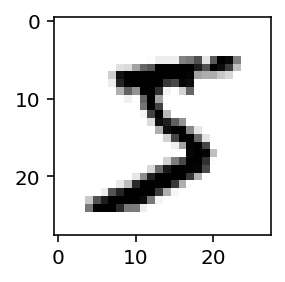

Label = 5


In [6]:
#Show image
img_index = 0
plt.figure(figsize = (2, 2))
plt.imshow(train_images[img_index].reshape(28,28), cmap='binary')
#plt.imshow(train_images[img_index])
plt.show()
print('Label = {0}'.format(train_labels[img_index]))

In [7]:
'''
x_train = train_images.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255
x_test = test_images.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_test.shape
'''

"\nx_train = train_images.reshape((60000, 28 * 28))\nx_train = x_train.astype('float32') / 255\nx_test = test_images.reshape((10000, 28 * 28))\nx_test = x_test.astype('float32') / 255\ny_train = to_categorical(train_labels)\ny_test = to_categorical(test_labels)\ny_test.shape\n"

In [8]:
'''
#Model Test
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_dim = 784))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()
'''

"\n#Model Test\nmodel = models.Sequential()\nmodel.add(layers.Dense(512, activation = 'relu', input_dim = 784))\nmodel.add(layers.Dense(10, activation = 'softmax'))\nmodel.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])\nmodel.summary()\n"

In [9]:
x_train = train_images.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = test_images.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_test.shape

(10000, 10)

In [10]:
#Model Test
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [11]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.1)

Epoch 1/10


  1/422 [..............................] - ETA: 0s - loss: 2.3014 - accuracy: 0.1172

  2/422 [..............................] - ETA: 1:00 - loss: 2.2820 - accuracy: 0.1016

  3/422 [..............................] - ETA: 1:23 - loss: 2.2523 - accuracy: 0.1536

  4/422 [..............................] - ETA: 1:33 - loss: 2.2486 - accuracy: 0.1562

  5/422 [..............................] - ETA: 1:38 - loss: 2.2264 - accuracy: 0.1859

  6/422 [..............................] - ETA: 1:43 - loss: 2.1820 - accuracy: 0.2253

  7/422 [..............................] - ETA: 1:52 - loss: 2.1163 - accuracy: 0.2612

  8/422 [..............................] - ETA: 1:58 - loss: 2.0852 - accuracy: 0.2812

  9/422 [..............................] - ETA: 1:59 - loss: 2.0480 - accuracy: 0.2995

 10/422 [..............................] - ETA: 1:59 - loss: 1.9884 - accuracy: 0.3242

 11/422 [..............................] - ETA: 1:59 - loss: 1.9151 - accuracy: 0.3594

 12/422 [..............................] - ETA: 1:56 - loss: 1.8634 - accuracy: 0.3770

 13/422 [..............................] - ETA: 1:58 - loss: 1.8401 - accuracy: 0.3864

 14/422 [..............................] - ETA: 1:56 - loss: 1.8083 - accuracy: 0.3951

 15/422 [>.............................] - ETA: 1:56 - loss: 1.7591 - accuracy: 0.4161

 16/422 [>.............................] - ETA: 1:56 - loss: 1.7070 - accuracy: 0.4385

 17/422 [>.............................] - ETA: 1:56 - loss: 1.6621 - accuracy: 0.4559

 18/422 [>.............................] - ETA: 1:54 - loss: 1.6157 - accuracy: 0.4705

 19/422 [>.............................] - ETA: 1:54 - loss: 1.5713 - accuracy: 0.4856

 20/422 [>.............................] - ETA: 1:54 - loss: 1.5203 - accuracy: 0.5023

 21/422 [>.............................] - ETA: 1:56 - loss: 1.4781 - accuracy: 0.5156

 22/422 [>.............................] - ETA: 1:56 - loss: 1.4409 - accuracy: 0.5270

 23/422 [>.............................] - ETA: 1:56 - loss: 1.4270 - accuracy: 0.5336

 24/422 [>.............................] - ETA: 1:55 - loss: 1.3956 - accuracy: 0.5443

 25/422 [>.............................] - ETA: 1:54 - loss: 1.3589 - accuracy: 0.5584

 26/422 [>.............................] - ETA: 1:55 - loss: 1.3267 - accuracy: 0.5709

 27/422 [>.............................] - ETA: 1:54 - loss: 1.3026 - accuracy: 0.5775

 28/422 [>.............................] - ETA: 1:53 - loss: 1.2970 - accuracy: 0.5781

 29/422 [=>............................] - ETA: 1:53 - loss: 1.2751 - accuracy: 0.5832

 30/422 [=>............................] - ETA: 1:52 - loss: 1.2535 - accuracy: 0.5901

 31/422 [=>............................] - ETA: 1:52 - loss: 1.2265 - accuracy: 0.5990

 32/422 [=>............................] - ETA: 1:51 - loss: 1.2003 - accuracy: 0.6084

 33/422 [=>............................] - ETA: 1:51 - loss: 1.1817 - accuracy: 0.6146

 34/422 [=>............................] - ETA: 1:51 - loss: 1.1637 - accuracy: 0.6202

 35/422 [=>............................] - ETA: 1:51 - loss: 1.1446 - accuracy: 0.6261

 36/422 [=>............................] - ETA: 1:50 - loss: 1.1296 - accuracy: 0.6304

 37/422 [=>............................] - ETA: 1:50 - loss: 1.1106 - accuracy: 0.6370

 38/422 [=>............................] - ETA: 1:50 - loss: 1.0930 - accuracy: 0.6425

 39/422 [=>............................] - ETA: 1:49 - loss: 1.0790 - accuracy: 0.6474

 40/422 [=>............................] - ETA: 1:48 - loss: 1.0653 - accuracy: 0.6525

 41/422 [=>............................] - ETA: 1:48 - loss: 1.0504 - accuracy: 0.6568

 42/422 [=>............................] - ETA: 1:49 - loss: 1.0367 - accuracy: 0.6613

 43/422 [==>...........................] - ETA: 1:49 - loss: 1.0226 - accuracy: 0.6657

 44/422 [==>...........................] - ETA: 1:48 - loss: 1.0115 - accuracy: 0.6701

 45/422 [==>...........................] - ETA: 1:47 - loss: 0.9999 - accuracy: 0.6747

 46/422 [==>...........................] - ETA: 1:47 - loss: 0.9868 - accuracy: 0.6787

 47/422 [==>...........................] - ETA: 1:47 - loss: 0.9728 - accuracy: 0.6838

 48/422 [==>...........................] - ETA: 1:47 - loss: 0.9589 - accuracy: 0.6890

 49/422 [==>...........................] - ETA: 1:47 - loss: 0.9462 - accuracy: 0.6934

 50/422 [==>...........................] - ETA: 1:47 - loss: 0.9325 - accuracy: 0.6981

 51/422 [==>...........................] - ETA: 1:46 - loss: 0.9241 - accuracy: 0.7013

 52/422 [==>...........................] - ETA: 1:46 - loss: 0.9200 - accuracy: 0.7024

 53/422 [==>...........................] - ETA: 1:46 - loss: 0.9101 - accuracy: 0.7062

 54/422 [==>...........................] - ETA: 1:45 - loss: 0.9013 - accuracy: 0.7096

 55/422 [==>...........................] - ETA: 1:45 - loss: 0.8900 - accuracy: 0.7132

 56/422 [==>...........................] - ETA: 1:45 - loss: 0.8785 - accuracy: 0.7172

 57/422 [===>..........................] - ETA: 1:44 - loss: 0.8703 - accuracy: 0.7193

 58/422 [===>..........................] - ETA: 1:45 - loss: 0.8642 - accuracy: 0.7204

 59/422 [===>..........................] - ETA: 1:45 - loss: 0.8551 - accuracy: 0.7233

 60/422 [===>..........................] - ETA: 1:45 - loss: 0.8460 - accuracy: 0.7268

 61/422 [===>..........................] - ETA: 1:45 - loss: 0.8371 - accuracy: 0.7298

 62/422 [===>..........................] - ETA: 1:44 - loss: 0.8283 - accuracy: 0.7326

 63/422 [===>..........................] - ETA: 1:44 - loss: 0.8199 - accuracy: 0.7356

 64/422 [===>..........................] - ETA: 1:44 - loss: 0.8135 - accuracy: 0.7379

 65/422 [===>..........................] - ETA: 1:43 - loss: 0.8056 - accuracy: 0.7406

 66/422 [===>..........................] - ETA: 1:43 - loss: 0.7984 - accuracy: 0.7425

 67/422 [===>..........................] - ETA: 1:43 - loss: 0.7917 - accuracy: 0.7446

 68/422 [===>..........................] - ETA: 1:43 - loss: 0.7827 - accuracy: 0.7477

 69/422 [===>..........................] - ETA: 1:42 - loss: 0.7764 - accuracy: 0.7498

 70/422 [===>..........................] - ETA: 1:42 - loss: 0.7694 - accuracy: 0.7518

 71/422 [====>.........................] - ETA: 1:42 - loss: 0.7629 - accuracy: 0.7537

 72/422 [====>.........................] - ETA: 1:41 - loss: 0.7541 - accuracy: 0.7569

 73/422 [====>.........................] - ETA: 1:41 - loss: 0.7466 - accuracy: 0.7596

 74/422 [====>.........................] - ETA: 1:41 - loss: 0.7390 - accuracy: 0.7620

 75/422 [====>.........................] - ETA: 1:40 - loss: 0.7324 - accuracy: 0.7643

 76/422 [====>.........................] - ETA: 1:40 - loss: 0.7262 - accuracy: 0.7661

 77/422 [====>.........................] - ETA: 1:39 - loss: 0.7199 - accuracy: 0.7680

 78/422 [====>.........................] - ETA: 1:39 - loss: 0.7139 - accuracy: 0.7697

 79/422 [====>.........................] - ETA: 1:39 - loss: 0.7065 - accuracy: 0.7723

 80/422 [====>.........................] - ETA: 1:39 - loss: 0.7012 - accuracy: 0.7740

 81/422 [====>.........................] - ETA: 1:38 - loss: 0.6945 - accuracy: 0.7761

 82/422 [====>.........................] - ETA: 1:38 - loss: 0.6879 - accuracy: 0.7782

 83/422 [====>.........................] - ETA: 1:38 - loss: 0.6824 - accuracy: 0.7802

 84/422 [====>.........................] - ETA: 1:38 - loss: 0.6767 - accuracy: 0.7821

 85/422 [=====>........................] - ETA: 1:37 - loss: 0.6725 - accuracy: 0.7835

 86/422 [=====>........................] - ETA: 1:37 - loss: 0.6677 - accuracy: 0.7852

 87/422 [=====>........................] - ETA: 1:36 - loss: 0.6621 - accuracy: 0.7869

 88/422 [=====>........................] - ETA: 1:36 - loss: 0.6567 - accuracy: 0.7886

 89/422 [=====>........................] - ETA: 1:36 - loss: 0.6524 - accuracy: 0.7899

 90/422 [=====>........................] - ETA: 1:36 - loss: 0.6503 - accuracy: 0.7906

 91/422 [=====>........................] - ETA: 1:35 - loss: 0.6458 - accuracy: 0.7919

 92/422 [=====>........................] - ETA: 1:35 - loss: 0.6406 - accuracy: 0.7936

 93/422 [=====>........................] - ETA: 1:35 - loss: 0.6356 - accuracy: 0.7954

 94/422 [=====>........................] - ETA: 1:34 - loss: 0.6298 - accuracy: 0.7973

 95/422 [=====>........................] - ETA: 1:34 - loss: 0.6247 - accuracy: 0.7989

 96/422 [=====>........................] - ETA: 1:34 - loss: 0.6210 - accuracy: 0.8002

 97/422 [=====>........................] - ETA: 1:33 - loss: 0.6175 - accuracy: 0.8012

 98/422 [=====>........................] - ETA: 1:34 - loss: 0.6137 - accuracy: 0.8025

 99/422 [======>.......................] - ETA: 1:34 - loss: 0.6107 - accuracy: 0.8036

100/422 [======>.......................] - ETA: 1:34 - loss: 0.6064 - accuracy: 0.8048

101/422 [======>.......................] - ETA: 1:34 - loss: 0.6021 - accuracy: 0.8064

102/422 [======>.......................] - ETA: 1:33 - loss: 0.5983 - accuracy: 0.8076

103/422 [======>.......................] - ETA: 1:33 - loss: 0.5952 - accuracy: 0.8086

104/422 [======>.......................] - ETA: 1:33 - loss: 0.5918 - accuracy: 0.8098

105/422 [======>.......................] - ETA: 1:33 - loss: 0.5875 - accuracy: 0.8111

106/422 [======>.......................] - ETA: 1:32 - loss: 0.5835 - accuracy: 0.8125

107/422 [======>.......................] - ETA: 1:32 - loss: 0.5800 - accuracy: 0.8137

108/422 [======>.......................] - ETA: 1:32 - loss: 0.5762 - accuracy: 0.8149

109/422 [======>.......................] - ETA: 1:31 - loss: 0.5723 - accuracy: 0.8162

110/422 [======>.......................] - ETA: 1:31 - loss: 0.5683 - accuracy: 0.8174

111/422 [======>.......................] - ETA: 1:31 - loss: 0.5652 - accuracy: 0.8183

112/422 [======>.......................] - ETA: 1:31 - loss: 0.5624 - accuracy: 0.8191

113/422 [=======>......................] - ETA: 1:31 - loss: 0.5603 - accuracy: 0.8200

114/422 [=======>......................] - ETA: 1:30 - loss: 0.5575 - accuracy: 0.8209

115/422 [=======>......................] - ETA: 1:30 - loss: 0.5542 - accuracy: 0.8220

116/422 [=======>......................] - ETA: 1:29 - loss: 0.5510 - accuracy: 0.8231

117/422 [=======>......................] - ETA: 1:29 - loss: 0.5475 - accuracy: 0.8243

118/422 [=======>......................] - ETA: 1:29 - loss: 0.5440 - accuracy: 0.8255

119/422 [=======>......................] - ETA: 1:30 - loss: 0.5415 - accuracy: 0.8261

120/422 [=======>......................] - ETA: 1:29 - loss: 0.5375 - accuracy: 0.8274

121/422 [=======>......................] - ETA: 1:29 - loss: 0.5340 - accuracy: 0.8284

122/422 [=======>......................] - ETA: 1:29 - loss: 0.5314 - accuracy: 0.8293

123/422 [=======>......................] - ETA: 1:28 - loss: 0.5288 - accuracy: 0.8302

124/422 [=======>......................] - ETA: 1:28 - loss: 0.5255 - accuracy: 0.8313

125/422 [=======>......................] - ETA: 1:28 - loss: 0.5230 - accuracy: 0.8322

126/422 [=======>......................] - ETA: 1:28 - loss: 0.5212 - accuracy: 0.8328

127/422 [========>.....................] - ETA: 1:27 - loss: 0.5192 - accuracy: 0.8333

128/422 [========>.....................] - ETA: 1:27 - loss: 0.5162 - accuracy: 0.8342

129/422 [========>.....................] - ETA: 1:27 - loss: 0.5133 - accuracy: 0.8350

130/422 [========>.....................] - ETA: 1:26 - loss: 0.5106 - accuracy: 0.8359

131/422 [========>.....................] - ETA: 1:26 - loss: 0.5077 - accuracy: 0.8370

132/422 [========>.....................] - ETA: 1:26 - loss: 0.5054 - accuracy: 0.8377

133/422 [========>.....................] - ETA: 1:25 - loss: 0.5029 - accuracy: 0.8386

134/422 [========>.....................] - ETA: 1:25 - loss: 0.5002 - accuracy: 0.8393

135/422 [========>.....................] - ETA: 1:25 - loss: 0.4979 - accuracy: 0.8402

136/422 [========>.....................] - ETA: 1:24 - loss: 0.4955 - accuracy: 0.8411

137/422 [========>.....................] - ETA: 1:24 - loss: 0.4926 - accuracy: 0.8420

138/422 [========>.....................] - ETA: 1:24 - loss: 0.4898 - accuracy: 0.8429

139/422 [========>.....................] - ETA: 1:23 - loss: 0.4879 - accuracy: 0.8436

140/422 [========>.....................] - ETA: 1:23 - loss: 0.4850 - accuracy: 0.8446

141/422 [=========>....................] - ETA: 1:23 - loss: 0.4824 - accuracy: 0.8455

142/422 [=========>....................] - ETA: 1:22 - loss: 0.4799 - accuracy: 0.8462

143/422 [=========>....................] - ETA: 1:22 - loss: 0.4774 - accuracy: 0.8471

144/422 [=========>....................] - ETA: 1:22 - loss: 0.4750 - accuracy: 0.8477

145/422 [=========>....................] - ETA: 1:21 - loss: 0.4725 - accuracy: 0.8486

146/422 [=========>....................] - ETA: 1:21 - loss: 0.4704 - accuracy: 0.8492

147/422 [=========>....................] - ETA: 1:21 - loss: 0.4682 - accuracy: 0.8498

148/422 [=========>....................] - ETA: 1:20 - loss: 0.4663 - accuracy: 0.8506

149/422 [=========>....................] - ETA: 1:20 - loss: 0.4644 - accuracy: 0.8512

150/422 [=========>....................] - ETA: 1:20 - loss: 0.4626 - accuracy: 0.8518

151/422 [=========>....................] - ETA: 1:20 - loss: 0.4603 - accuracy: 0.8525

152/422 [=========>....................] - ETA: 1:20 - loss: 0.4582 - accuracy: 0.8531

153/422 [=========>....................] - ETA: 1:20 - loss: 0.4568 - accuracy: 0.8537

154/422 [=========>....................] - ETA: 1:19 - loss: 0.4557 - accuracy: 0.8540

155/422 [==========>...................] - ETA: 1:19 - loss: 0.4539 - accuracy: 0.8546

156/422 [==========>...................] - ETA: 1:19 - loss: 0.4515 - accuracy: 0.8553

157/422 [==========>...................] - ETA: 1:18 - loss: 0.4494 - accuracy: 0.8559

158/422 [==========>...................] - ETA: 1:18 - loss: 0.4476 - accuracy: 0.8564

159/422 [==========>...................] - ETA: 1:18 - loss: 0.4458 - accuracy: 0.8571

160/422 [==========>...................] - ETA: 1:17 - loss: 0.4440 - accuracy: 0.8578

161/422 [==========>...................] - ETA: 1:17 - loss: 0.4421 - accuracy: 0.8584

162/422 [==========>...................] - ETA: 1:17 - loss: 0.4402 - accuracy: 0.8589

163/422 [==========>...................] - ETA: 1:16 - loss: 0.4382 - accuracy: 0.8595

164/422 [==========>...................] - ETA: 1:16 - loss: 0.4365 - accuracy: 0.8601

165/422 [==========>...................] - ETA: 1:16 - loss: 0.4349 - accuracy: 0.8606

166/422 [==========>...................] - ETA: 1:15 - loss: 0.4331 - accuracy: 0.8611

167/422 [==========>...................] - ETA: 1:15 - loss: 0.4311 - accuracy: 0.8616

168/422 [==========>...................] - ETA: 1:15 - loss: 0.4294 - accuracy: 0.8623

169/422 [===========>..................] - ETA: 1:15 - loss: 0.4276 - accuracy: 0.8629

170/422 [===========>..................] - ETA: 1:14 - loss: 0.4258 - accuracy: 0.8636

171/422 [===========>..................] - ETA: 1:14 - loss: 0.4240 - accuracy: 0.8641

172/422 [===========>..................] - ETA: 1:14 - loss: 0.4223 - accuracy: 0.8647

173/422 [===========>..................] - ETA: 1:13 - loss: 0.4204 - accuracy: 0.8653

174/422 [===========>..................] - ETA: 1:13 - loss: 0.4184 - accuracy: 0.8660

175/422 [===========>..................] - ETA: 1:13 - loss: 0.4174 - accuracy: 0.8663

176/422 [===========>..................] - ETA: 1:12 - loss: 0.4162 - accuracy: 0.8666

177/422 [===========>..................] - ETA: 1:12 - loss: 0.4148 - accuracy: 0.8671

178/422 [===========>..................] - ETA: 1:12 - loss: 0.4131 - accuracy: 0.8677

179/422 [===========>..................] - ETA: 1:12 - loss: 0.4111 - accuracy: 0.8683

In [0]:
history_dict = history.history
history_dict.keys()

In [0]:
# verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

In [0]:
test_loss

In [0]:
test_acc

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r--', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()